In [23]:
# dane
g = 9.81
m = 2
vx₀ = 30
α = π / 4
vy₀=26.5
v₀=30
h=80


hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g

delta1=4*v₀^4*sin(α)*sin(α)*cos(α)*cos(α)+8*g*h*v₀^2*cos(α)*cos(α)
zasieg=(-2*v₀^2*sin(α)*cos(α)-sqrt(delta1))/(-2*g)  

delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)


6.743441731108463

In [22]:
function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, czas / dt), 1)
    vy[1] = v₀ * cos(α)
    y = zeros(floor(Int, czas / dt), 1)
    y[1] = 0
    for i in (2 : floor(Int, czas / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end
function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, czas / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, czas / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end

function vx_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, czas / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, dt)
    vy = zeros(floor(Int, czas / dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, czas / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
    end
    return vy
end

function x(v₀, α)
    t -> v₀ * t * cos(α)
end

function y(v₀, α, g,h)
    t -> h+v₀ * t * sin(α) - (g * t ^ 2) / 2
end

function v_x(v₀, α)
    t -> v₀ * cos(α)
end

function v_y(v₀, α, g)
    t -> v₀ * sin(α) - g * t
end

vy_num (generic function with 1 method)

In [ ]:
dt=0.001
k=0.5
czas_opor = 0
for i in (1 : floor(Int, czas / dt))
    if abs(y_num(v₀, α, k, m, g,h, dt)[i]) < 0.007
        czas_opor = i
    end
end
czas_opor

In [14]:
zasieg_opor = x_num(v₀, α, k, m, dt)[czas_opor]

51.59648732658971

In [37]:
czas_opor=4324
#czas_opor_endd=0
for j in (czas_opor : floor(Int, czas / dt))
    czas_opor_endd=0
    if abs(y_num(v₀, α, k, m, g, h,dt)[j]) < 10.07
        czas_opor_endd = czas_opor+j
    end
end
czas_opor_endd

8648

## wizualizacja (późńiej można się zająć zrobieniem gifa z tego)

In [4]:
using Plots
using Printf

In [13]:
#dane
g=-9.81

friction=0.1
aerodrag=0.1

height_inrun = 130#150
height_ramp = 80#100
length_ramp = 15
distance_max = height_inrun * 2

angle_inrun = 28/180 * π #35
angle_slope = 32/180 * π

distance_ramp = (height_inrun - height_ramp)/tan(angle_inrun)
length_slope = height_ramp / tan(angle_slope)
distance_slope= distance_ramp + length_ramp + length_slope
tan_inrun = tan(angle_inrun)
tan_slope = tan(angle_slope)
cos_inrun = cos(angle_inrun)
cos_slope = cos(angle_slope)
sin_inrun = sin(angle_inrun)
sin_slope = sin(angle_slope)

0.5299192642332049

In [18]:
function vx_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, czas / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, dt)
    vy = zeros(floor(Int, czas / dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, czas / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
    end
    return vy
end


function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end

function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * cos(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end




y_num (generic function with 1 method)

In [14]:
function draw_track()
    axis_x = [0,distance_max] #not sure about these list xd
    axis_y = [0,distance_max]
    #nie wyświetla tego narazie
    #plot(axis_x,axis_y,seriestype = :scatter, leg = false) 
    
    track_x = []
    track_y = []
    
    #draw the in-run
    push!(track_x,0.0)
    push!(track_y,height_inrun)
    push!(track_x,distance_ramp)
    push!(track_y,height_ramp)
    #draw the ramp
    push!(track_x,distance_ramp + length_ramp)
    push!(track_y,height_ramp)
    #draw the slope
    push!(track_x,distance_slope)
    push!(track_y,0)
    
    return track_x,track_y,axis_x,axis_y
end

function ski_a_bit(posx,posy,vx,vy,timebit)
    gy=g
    gx=0
    
    if posx < distance_ramp #skier on in-rum
        gx= -g*sin_inrun*cos_inrun * (1-friction)
        gy= g*(1-cos_inrun*cos_inrun)* (1-friction)
        
    elseif posx < distance_ramp + length_ramp #skier on ramp
        gx=0
        gy=0

        if vy!=0
            vx=(vx^2 + vy^2)^0.5
            @printf("Speed at ramp: %.2f m/s'", vx)
        end
        #enforce a zero vertical speed as the ramp is 'flat'
        vy=0
    elseif posx < distance_slope #skier on the slope
        slope_height_posx = (distance_slope - posx)* tan_slope
        if posy >= slope_height_posx -1.0
            gx=gx *aerodrag
            gy=gy *(1-aerodrag)
        else
            posy = slope_height_posx + 1 
            
            gx=-g*sin_slope*cos_slope
            gy= g*(1-cos_slope*cos_slope)
            angle_landing = atan(-vy/vx) - angle_slope
            jumped = ((posx-(distance_ramp+length_ramp))^2 +(posy-height_ramp)^2)^0.5
            v_new=(vx^2+vy^2)^0.5 * cos(angle_landing)
            
            vx= v_new * cos_slope
            vy= -v_new * sin_slope
            if angle_landing > 0.15
                @printf("landing as angle %.f, speed at %.2fm/s, jumped %.2fm",angle_landing,v_new,jumped)
            end
        end
    else #skier on the ground/flat surface
        gx=0
    end
    
    if posy <0
        gy=0
        vx=(vx^2+vy^2)^0.5
        vy=0
    end
    vx += gx*timebit*0.5
    posx += vx*timebit + 0.5*gx*timebit^2
    vx += gx*timebit*0.5
    #same for y
    vy += gy*timebit*0.5
    posy += vy*timebit + 0.5*gy*timebit^2
    vy += gy*timebit*0.5 
    
    return posx,posy,vx,vy
end

function ski()
    me_x = 0 
    me_y = height_inrun
    speed_x = 0
    speed_y = 0
    timebit = 0.02 #second
    counter = 0
    
    motion_x=[]
    motion_y=[]
    
    while me_x < distance_max
        me_x,me_y,speed_x,speed_y= ski_a_bit(me_x,me_y,speed_x,speed_y, timebit)
        counter += 1
        if counter %10 ==0
            push!(motion_x,me_x)
            push!(motion_y,me_y)
        end
    end
    
    track_x,track_y,axis_x,axis_y=draw_track()
    plot(axis_x,axis_y,seriestype = :scatter, leg = false) 
    plot!(track_x,track_y)
    plot!(motion_x,motion_y, seriestype=:scatter)
end
 ski()   

ski (generic function with 1 method)

In [20]:
czas = (2 * v₀ * sin(α)) / g
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)
h=80

czas_opor = 0
czas_opor_end=0
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_num(v₀, α, k, m, g, h,dt)[i]) < 0.007
        czas_opor = i
       
    end
end
czas_opor
zasieg_opor = x_num(v₀, α, k, m, dt)[czas_opor]
hₘ_opor = maximum(y_num(v₀, α, k, m, g,h, dt)

0

        # t e o r i a       d o        n o ś n e j

W tym przypadku do zaprezentowanych wcześniej równań z oporami powietrza, dokładamy parametry związane z siłą nośną.  

$$ v_x(t_{j+1})=v_x(t_j)-\frac{k}{m}v_x(t_j)\Delta{t}+\frac{p}{2m}v_x(t_j)\Delta{t}  $$

$$ v_y(t_{j+1})=v_y(t_j)-g\Delta{t}-\frac{k}{m}v_y(t_j)\Delta{t}+\frac{p}{2m}v_y(t_j)\Delta{t} $$

$$x(t_{j+1})=x(t_j)+v_x(t_j)\Delta{t}-\frac{k}{2m}v_x(t_j)\Delta{t^2}+\frac{p}{2m}v_x(t_j)\Delta{t}  $$

$$y(t_{j+1})=y(t_j)+v_y(t_j)\Delta{t}-\frac{1}{2}g\Delta{t^2}-\frac{k}{2m}v_y(t_j)\Delta{t^2}+\frac{p}{2m}v_y(t_j)\Delta{t}$$




$P$ jest współczynnikiem siły nośnej. Zależy on głównie od panujących warunków atmosferycznych. W naszej analizie przyjmujemy, że jest on stały. 

## <span style="color:#708090;">Spis treści: </span>
---------------------------------------------------------------
(#do dokończenia jak już będziemy miały całość)
* [1. Wstęp](#wstep)
* [2. Wprowadzenie historyczno-teoretyczne](#wprowadzenie)
* [3. Założenia](#zalozenia)
* [4. Równania bez uwzględnienia oporów powietrza](#bez_opor)
* [5. Rozwiązania analityczne](#analityk) 
    *  [5.1 Rówania z oporami powietrza](#opor) 
* 6. [Rozwiązanie analityczne](#opor_analityka)
 * [Rozwiązanie numeryczne](#opor_numer)
* [Równania ruchu z wiatrem](#wiatr)
 * [Rozwiązania analityczne równań z wiatrem](#wiatr_analityka)
 * [Rozwiązania numeryczne równań z wiatrem](#wiatr_numer)
 
* [Bibliografia](#bibliografia)



-----------------------------------------------------------------

## krótka notka historyczna

Jeszcze kilkanaście lat wstecz ludzie nie mieli tak ogromnej wiedzy dotyczącej skoków narciarskich. Wracając do początków skoków narciarskich, jesteśmy w stanie zauważyć dużą różnicę i postęp jaki nastąpił w tej dziedzinie sportowej na przestrzeni lat. Szczególną uwagę zwrócimy na stylu latania. Początkowo skoczkowie skakali w *stylu kucznym*, który polegał na podkurczeniu nóg tuż po odbiciu oraz na machaniu rękami w celu "złapania wiatru". Szybko jednak został on zastpąiony nowym stylem wymyślonym przez Norwega - Sondre Nordhein'a. To on wprodzaił prostowanie kolan oraz całego ciała podczas skoku, uzyskując pierwszą rekordową odległość 30.5m. Styl ten nazwano *telemarkowym*, po którym do dziś funkcjonuje nazwa lądowania telemarkiem. Kolejną zmianą jaka nastąpiła w stylu była zmiana ruchu rąk. Polegała ona na tym, że ręce były wysuwane przed siebie. 
Kilka lat później aspekt ten zmienili Finowie, zaczynając trzymać ręce wzdłuż tłuowia. Opracowali także sposób na przejście do ślizgu w drugiej fazie lotu. Nowy styl nazwano *aerodynamicznym*. Na tym etapie narty podczas lotu były ustawiane równolegle. Sprawiło to, że został pobity rekord w skokach mający długość 139m. 
W dzisiejszych czasach funkcjonuje styl *Boklova*, którego nazwa pochodzi od skoczka Jana Bokolov'a. Był on pierwszym skoczkiem, który ustawił narty w kształt litery "V" jednocześnie umożliwiając mu większe na większe pochylenie w ich kierunku.


[[1]](#historia) Szatkowski W, *Ewolucja stylów w skokach narciarskich - cz. 1*, 2006, https://www.skijumping.pl/wiadomosci/5300/ewolucja-stylow-w-skokach-narciarskich---cz-1/

# <span style="color:#708090;">2. Rozwiązanie analityczne</span>

Teraz skupimy się na działaniu siły oporu. Z uwagi na to, że skoczek porusza się w powietrzu mamy do czynienia z działaniem oporu aeorydanamicznego:

$$D=-\frac{1}{2}CS{\rho}v^2,$$ 
gdzie:
<ul>
    <li>$C$ - doświadczalnie wyznaczany współczynnik oporu aerodynamicznego,</li> 
    <li>$S$ - pole przekroju ciała, </li>
    <li>$\rho$ - gęstość powietrza, </li>
    <li>$v$ - prędkość względna.</li>
</ul>

Dla ułatwienia obliczeń przyjmijmy, że siła oporu jest wprost proporcjonalna do prędkości skoczka i definiuje ją wzór:

$$D=-kv.$$

W pierwszej kolejności postaramy się znaleźć analityczne rozwiązanie toru ruchu skoczka narciarskiego.

Siła oporu:

$$D=-kv$$

Prędkość początkową definują wzory:

$$v_x=v_o\sin{\alpha}, v_y=v_o\cos{\alpha}$$

$$\vec{v_o}=(v_x,v_y)$$




Z drugiej zasady dynamiki Newtona wynika, że:
$$F=ma,$$
stąd ruch ciała opisuje układ równań:

$$ ma_x=kv_x$$

$$ma_y=-mg-kv_y$$

Wiadomo także, że przyśpieszenie to druga pochodna po czasie, zatem:

$$ m\frac{d^2x}{dt^2}=k\frac{dx}{dt}$$

$$m\frac{dy^2}{dt^2}=-mg-k\frac{dy}{dt}$$

Jest to układ równań liniowych drugiego rzędu. Ustalamy warunki początkowe:

$$x(0)=0, y(0)=80$$

Dokonując podstawienia:

$$u=\frac{dx}{dt} $$$$z=\frac{dy}{dt}$$

otrzymamy układ równać postaci:
$$u(t)=C\exp{(\frac{-k}{m}t)}$$
$$z(t)=...$$

Odpowiednio całkując i wykorzystując warunki początkowe otrzymujemy układ równań opisujących tor lotu skoczka narciarskiego z oporami powietrza:

\begin{equation}
\tag{1}
x(t)=(\frac{m}{k}v_o\cos{\alpha})(1-e^{\frac{-k}{m}{t}}) 
\end{equation}
\begin{equation}
\tag{2}
y(t)=(\frac{m}{k}v_o\sin{\alpha}+\frac{m^{2}}{k^{2}}g)(1-e^{\frac{-k}{m}{t}})-\frac{m}{k}gt
\end{equation}

# <span style="color:#708090;">3. Rozwiązanie numeryczne - metoda Eulera</span>

Aby rozwiązać numerycznie nasze równania posłużymy się metodą Eulera. Opiera się ona na zastąpieniu różniczek różnicami:


$$\frac{\Delta{y}}{\Delta{t}}=f(y,t),   y(0)=y_o$$

$$\frac{y_{j+1}-y_j}{\Delta{t}}=f(y_j,t_j)$$

Przekształcając powyższe wyrażenie otrzymujemy formułę Eulera:

\begin{equation}
\tag{3}
y_{j+1}=y_j+(\Delta{t})f(y_j,t_j)
\end{equation}

# <span style="color:#708090;">a) uwzględniając opory powietrza </span>

Wykorzystamy przybliżenie:

$$a=\frac{\Delta{v}}{\Delta{t}}$$

Korzystając z wcześniej wyprowadzonych równań ruchu (1) i (2)

$$ m\frac{\Delta{v_x}}{\Delta{t}}=kv_x$$

$$m\frac{\Delta{v_y}}{\Delta{t}}=-mg-kv_y$$

Korzystając z warunków początkowych i pręd. oraz metody eulera (3)

Stąd otrzymujemy wzory opisujące ruch skoczka z uwzględnieniem oporów powietrza:

$$ v_x(t_{j+1})=v_x(t_j)-\frac{k}{m}v_x(t_j)\Delta{t} $$

$$ v_y(t_{j+1})=v_y(t_j)-g\Delta{t}-\frac{k}{m}v_y(t_j)\Delta{t} $$

$$x(t_{j+1})=x(t_j)+v_x(t_j)\Delta{t}-\frac{k}{2m}v_x(t_j)\Delta{t^2}  $$

$$y(t_{j+1})=y(t_j)+v_y(t_j)\Delta{t}-\frac{1}{2}g\Delta{t^2}-\frac{k}{2m}v_y(t_j)\Delta{t^2}$$

### nowe

In [26]:
zasieg_opor_wiatr= 145
hₘ_opor_wiatr= 90

90

In [27]:
m=55
plot(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "m=55",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    title = "tor ruchu")

m=65
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "m=65",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    title = "tor ruchu")

m=75
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "m=75",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    legend = :topright,
    title = "tor ruchu")

LoadError: [91mUndefVarError: x_wind2 not defined[39m

In [ ]:
hₘ_opor_wiatr= 100
α = π / 9
plot(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "α = π / 9",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    title = "tor ruchu")

α = π / 6
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "α = π / 6",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    title = "tor ruchu")

α = π / 4
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "α = π / 4",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    legend = :topright,
    title = "tor ruchu")

α = π / 5
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "α = π / 5",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    legend = :topright,
    title = "tor ruchu")

In [ ]:
hₘ_opor_wiatr= 100
k = 0.5
plot(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "k = 0.5",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    title = "tor ruchu")

k = 1
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "k = 1",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    title = "tor ruchu")

k = 2
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "k = 2",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    legend = :topright,
    title = "tor ruchu")


In [ ]:
hₘ_opor_wiatr= 100
vw = 1
plot(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "vw = 1",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    title = "tor ruchu")

vw = 5
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "vw = 5",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    title = "tor ruchu")

vw = 10
plot!(x_wind2(v₀,vw, α, k, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "vw = 10",
    xlim = (0, zasieg_opor_wiatr),
    ylim = (0, hₘ_opor_wiatr),
    legend = :topright,
    title = "tor ruchu")


In [28]:
include("skocznia.jl")k=0.5
#708090
k1=1
k2=2
lbl="cos"
lbl2="cos2"
plot_with_skijump2(80,28,x_wind2(v₀,vw, α, k1, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),107.5,lbl,x_wind2(v₀,vw, α, k2, m, dt), y_wind2(v₀, vw, α, k, m, g, h, dt),103,lbl2)

LoadError: [91msyntax: "include("skocznia.jl")" is not a valid function argument name around In[28]:1[39m

In [29]:
plot_with_skijump(80,28,x_n(v₀, α, k, m,p,dt), y_n(v₀, α, k, m, g,h, p, dt),130,"tor ruchu z oporami i siłą nośną")

LoadError: [91mUndefVarError: x_n not defined[39m

In [34]:
include("skocznia.jl")

Main.skocznia

In [59]:
include("skocznia.jl")

Main.skocznia

In [35]:
function vx_n(v₀, α, k, m,p, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt + (p / m) * vx[i-1] * dt
    end
    return vx
end

function vy_n(v₀, α, k, m, g, p, dt)
    vy = zeros(floor(Int, (czas+t1)/ dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, (czas+t1)  / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt  + (p / m) * vy[i-1] * dt 
    end
    return vy
end


function x_n(v₀, α, k, m,p, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt + (p / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2 + (1 / 2)*(p / m) * vx[i-1] * dt
    
    end
    return x
end

function y_n(v₀, α, k, m, g,h,p, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt+ (1 / 2) * (p / m) * vy[i-1] * dt ^ 2
    
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2 + (1 / 2) * (p / m) * vy[i-1] * dt ^ 2
    end
    return y
end

y_n (generic function with 1 method)

In [38]:
using Plots
using Printf

In [46]:
# dane
g = 9.81
m = 65
α = π / 9
v₀=26.5
h=80
# obliczenia
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
delta1=4*v₀^4*sin(α)*sin(α)*cos(α)*cos(α)+8*g*h*v₀^2*cos(α)*cos(α)
zasieg=(-2*v₀^2*sin(α)*cos(α)-sqrt(delta1))/(-2*g)
delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)
czas = (2 * v₀ * sin(α)) / g
h=80
dt = 0.001
k = 0.5

0.5

In [61]:
p=1
t1+czas

6.914607517439525

In [56]:
p=1
t1+czas
zasieg_opor=150
hₘ_opor=90

90

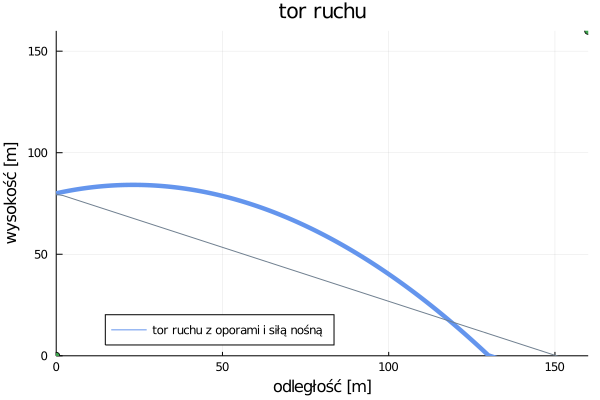

In [60]:
skocznia.plot_with_skijump(80,28,czas,t1,dt,zasieg_opor,hₘ_opor,x_n(v₀, α, k, m,p,dt), y_n(v₀, α, k, m, g,h, p, dt),130,"tor ruchu z oporami i siłą nośną")